<a href="https://colab.research.google.com/github/konkuk-gaegul/3rd-Team-Project/blob/main/Stacks_For_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 업무 분장
- DataScience (안재형, 이민형)
    - 지도학습
        - Pytorch
            - 웰시코기, 리트리버, 닥스훈트
        - Keras
            - 말티즈, 비글, 치와와
- FrontEnd (김소영, 조세익)
    - vue.js
        - components 구성 -> App, footer, header, mymodal
        - views 페이지 구성 -> 로그인, 회원가입, 견종선택, 검사, 결과화면
        - css, router 설정
        - axios, webpack, nginx를 이용하여 서버 배포
- BackEnd (이경희)
    - REST API 설계
    - Django Rest Framework을 이용한 API 개발
    - docker와 nginx, uWSGI를 이용한 서버 배포
- DataEngineering (조경상)
    - AI Hub에서 제공하는 개의 행동 특성 분석 이미지 수집
        - 약 200,000 장 제공
        - 객체(개)만 잘라오는 머신러닝 프로그램 활용

# 이미지 수집과 레이블링
- 소/중/대현견마다 크기가 다르기 때문에 견종별로 모델링
- 팀원 6명 마다 1개 견종을 맡아 이미지 수집
    - 닥스훈트, 리트리버, 말티즈, 비글, 웰시코기, 치와와
    - 견종별로 1,000장 수집 (3일 소요)

## 이미지 수집 조건
- 웹 크롤링을 이용하여 이미지 수집
- 미성견은 비만/정상 판단이 불가하기 때문에 성견만 수집
- B.C.S(Body Condition Score)를 활용, 비만도를 1 ~ 5단계로 나누어 비만 판단
- 정상 이미지, 비만 이미지는 1 : 1 비율을 이루도록 수집

## 1차 수집된 이미지

|구분|닥스훈트|리트리버|말티즈|비글|웰시코기|치와와|총 계|
|------|------|------|------|------|------|------|------|
|정상|700|602|701|859|579|728|4206|
|비만|301|405|267|135|408|200|1748|
|총 계|1001|1007|968|994|987|928|5954|

- 이미지 수집의 한계
    - 네이버, 구글, 다음 등 검색 엔진의 절대적인 수가 적음
    - 일반적으로 비만 개체는 적은 편임
    - 몇몇 크롤링 자료에는 중복된 이미지 존재

## BCS(Body Condition Score)
- ![poster](https://web-wit.s3.ap-northeast-2.amazonaws.com/images/boardPet/220/pet_1616603166_1.jpg)
- 출처 : https://www.witkorea.kr/community/dog/1450

## 레이블링
- 더욱 정확한 서비스 제공을 위해 직접 정상/비만 레이블링
    - 모든 이미지를 수기로 레이블링 진행함 (3일 소요)

# Data Science

## CNN Modeling
- TensorFlow Keras 라이브러리 활용
- 학습을 진행하기 전, 이미지 전처리 필수
    - Resize
        - 모든 이미지가 다른 크기를 갖기 때문
    - Scaling
        - 학습에 용이하게 0 ~ 255 값을 갖는 RGB 색 정보를 255로 나누어 0 ~ 1 사이 값을 갖도록 함
- 이미지 증식 활용
    - 비만견 사진이 절대적으로 부족하여 필수로 진행
    - 좌/우, 상/하 평행이동, 40도 범위 내에서 이미지 회전, 수평/수직 반전
- 훈련, 검증 set 구성
    - train : 50%
    - validation : 25%
    - test : 25%


## Pytorch Modeling
- Transfer Learning (전이학습 방법 채택)
- 이미지 증식 활용
- 리트리버, 닥스훈트, 웰시코기 학습에 적용
    - 이미지 전처리 세트를 약 10개 생성
    - 견종별로 가장 효과적인 세트를 찾는다.
- batch_size, epoch 등 parameter를 다양하게 조절하여 최적의 성능을 구한다.
- 훈련, 테스트 세트 구성
    - train : 75%
    - test : 25%

## 전제조건 모델링
- 기존 모델은 사람 이미지가 입력되어도 비만, 정상을 분류한다.
- 적어도 개, 고양이, 사람 3개 클래스는 구분해서 이미지를 입력 받자는 아이디어
- Pytorch 전이학습을 활용해서 학습 진행
- 정확도 : 99.5%, Loss : 0.002

# Backend

## REST API 설계

**핵심 기능**
1. 로그인
  * CRUD - ID, PW를 데이터를 받아와서 로그인
  * HTTP verbs - POST
  * Route - /dogobesitytest
2. 회원가입
  * CRUD - ID, PW를 입력하여 회원가입 ( 회원생성 )
  * HTTP verbs - POST 
  * Route - signup
3. 예측 결과 도출
  * CRUD -  견종과, 업로드 한 이미지를 받아와서 예측결과 도출
  * HTTP verbs - POST
  * Route - /dogimage
**부가 기능**
1. 좋아요(like) 기능
  * CRUD - 이미지명이 동일한 해당 row의 like column값을 1로 변경
  * HTTP verbs - PUT
  * Route - /testresult

  

## API 개발
- Django Rest Framework을 이용한 API 개발

**초기 페이지 (로그인 페이지)**  
< http://35.76.37.170:8980/dogobesitytest >  
  * POST 요청 ( 로그인 )   
    - 주고 받는 데이터 ( JSON 형식 ) 
      - userid, password   
    - ID와 PW가 일치하는 경우   
      - status 200 전송    
    - ID와 PW가 불일치하는 경우   
      - status 400 전송

-

**회원가입 페이지**  
< http://35.76.37.170:8980/dogobesitytest/signup >
* POST 요청
	- 주고 받는 데이터 ( JSON 형식 ) 
		- userid, password

  - 사용하고자 하는 ID가 이미 존재할 경우
    - status 409 전송
  - 사용하고자 하는 ID가 존재하지 않을 경우
    - 유효성 검사 통과 시
      - password를 암호화 후 id와 암호화 된 pw를 DB에 저장
      -  status 201 전송
    - 유효성 검사 실패 시
      - status 400

-

**견종 선택 & 이미지 업로드 페이지**   
< http://35.76.37.170:8980/dogobesitytest/dogimage >
* POST 요청
	- 주고 받는 데이터 ( JSON 형식 ) 
		- userid, dog_breed, image(base64형식으로 변환된 데이터)    

  - 유효성 검사 성공시
    - `userid, image, dog_breed, testresult, like, created`data를 DB에 저장 후 웹에 JSON 형태로 전송 
    - status 201 전송
  - 유효성 검사 실패 시
    - status 400 전송

-

**결과페이지**   
< http://35.76.37.170:8980/dogobesitytest/testresult >
* PUT 요청
  - 주고 받는 데이터 ( JSON 형식 ) 
      - `userid, dog_breed, image, testresult, like` 
  - 성공 시
    - 해당 이미지명과 동일한 row의 like column값 1로 변경 후 DB에 반영
    - status 200 전송
  - 실패 시 
    - status 400

## 서버 배포
- Django와 Nginx를 각각의 Docker이미지로 만들고, 이를 실행 및 관리하기 위해 docker-compose 사용

--------------------------------------------------------

- Docker   
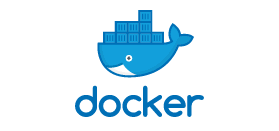 
  - Docker 사용이유
    - 쉽게 서버 배포가 가능하며, 관리가 편함

- Web Server
  - Nginx 사용  
  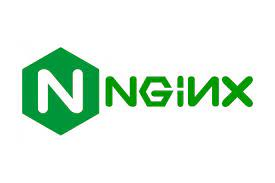
  - Nginx 사용이유 
    - 리버스 프록시(인터넷과 백엔드 사이에 있는 서버)로 사용 가능
      - 로드 밸런싱 역할 수행, 캐싱 가능, 민감한 WAS 정보를 숨기는 보안 역할 수행
    - 비동기 처리
      - Event loop 기반으로 상당히 많은 트래픽을 동시에 처리 가능
    - 등 ... 

- WSGI
  - uWSGI 사용  
    : 웹서버(Nginx)와 웹 애플리케이션(Django) 사이의 인터페이스 역할 (프로토콜)  
    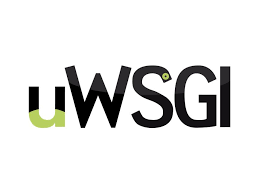

# Frontend

## vue.js
  - 웹 개발을 단순화하고 정리하기 위해 개발된 대중적인 자바스크립트 프론트엔드 프레임워크

  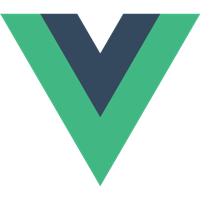

## components 구성
  - App.vue 
    - header, footer를 import 하고 로그인 후 상단에 견종선택, 검사, 결과, logout 페이지 선택기능
  - MainHeader.vue
  - MainFooter.vue 

## views 페이지 구성
  - Login.vue(로그인)
    - 메인화면, 로그인 성공 시 견종선택으로 이동,  실패 시 alert
  - SignUp.vue(회원가입)
    - 아이디, 비밀번호, 비밀번호 확인 -> 유효성 확인
    - 아이디 중복수 에러 메세지 제공
    - 회원가입 성공 시 로그인으로 이동 
  - Checkbox.vue(견종선택)
    - checkbox로 견종을 선택하고 이미지업로드로 이동
  - Secure.vue(이미지업로드)
    - drag & drop 으로 이미지파일 업로드
    - 첨부된 사진은 리스트로 생성, 삭제가능
    - 결과버튼 클릭 시 견종, 이미지 정보를 backend로 전송하고 로딩화면(spinner) 띄운 후 결과로 이동
  - Result.vue(결과)
    - backend에서 받아온 결과 출력
    - 좋아요 버튼을 통해 검사 결과에 대한 만족도 표현
    - sns 공유하기 -> 카톡, 트위터, 페이스북, 링크복사




## css, router 설정
  - css 설정
    - font-face(웹폰트), scss(스타일규칙), keyframes(애니메이션), font awesome(아이콘), modal(로딩 스피너) 외 다양한 효과 사용
  - router 설정
    - vue-router
      - 메인 http://3.113.137.203/dogobesitytest/
      - 회원가입 http://3.113.137.203/dogobesitytest/signup
      - 견종 http://3.113.137.203/dogobesitytest/checkbox
      - 검사 http://3.113.137.203/dogobesitytest/dogimage
      - 결과 http://3.113.137.203/dogobesitytest/testresult

## 상세 기능

**로그인**
- 아이디와 패스워드를 입력
- 로그인 버튼을 누르면 백엔드로 아이디와 패스워드를 POST 방식으로 전송
  - `user : { userid:'', password:'' }`
  - 로그인 성공 시
    - 응답 코드 200
    - userid 를 localStorage에 저장
    - authenticated 를 'true'로 localStorage에 저장
    - 견종선택페이지로 넘어감
  - 로그인 실패 시
    - 응답 코드 500
    - 에러 메세지를 띄움
- 회원가입 버튼
  - 회원가입 페이지로 이동
- 페이지 접속 시 localStorage 초기화

**회원가입**
- 아이디, 비밀번호, 비밀번호 확인을 입력
- 정규식을 이용하여 아이디와 비밀번호의 유효성을 검사
  - 아이디에는 영문자와 숫자만 사용가능
  - 비밀번호는 4-16자 사이의 숫자+영문자 혼합해야 함
  - 비밀번호 확인은 비밀번호와 같은 값을 입력해야 함
- 값이 입력되어있지 않거나 유효성을 만족시키지 못하면 그에 따른 메세지를 출력
- 값을 입력 후 회원가입 버튼을 누르면 아이디와 패스워드를 POST 방식으로 전송
  - `user : { userid:'', password:'' }`
  - 값이 입력되어 있고 유효성을 만족시키고 Id가 중복되지 않는다면    
    - 응답코드 201
    - 회원가입에 성공했다는 메세지를 출력
    - 로그인 페이지로 이동
  - 값이 입력되어 있고 유효성을 만족시키지만 Id가 중복된다면
    - 응답코드 409
    - 아이디가 중복된다는 메세지를 출력

**견종선택**
- 페이지 접속 시 localStorage에 저장된 authenticated를 전송
- authenticated가 'true'여야 진행 가능 아니면 login페이지로 이동
- 6종(닥스훈트, 비글, 리트리버, 말티즈, 웰시코기, 치와와)의 견종을 선택가능
- 중복선택 불가
- 선택한 견종을 표시해줌
- 다음 버튼을 클릭하면
  - localStorage에 선택한 견종을 저장함
  - 이미지업로드 페이지로 이동

**이미지 업로드**
- 페이지 접속 시 localStorage에 저장된 authenticated를 전송
- authenticated가 'true'여야 진행 가능 아니면 login페이지로 이동
- Drag & Drop 및 클릭으로 이미지를 업로드 가능
- 업로드한 이미지는 리스트로 생성, 삭제 가능
- 이미지를 업로드 한 후 결과 버튼을 누르면 POST 방식으로 이미지, Id, 견종을 전송
  - `upload : { userid:'', image:'', dog_breed:''}`
  - 이때 이미지는 base64 형식으로 변환 후 전송
  - base64 형식으로 변환된 이미지는 localStorage에 저장됨
  - 응답이 오기 전까지 spinner를 활용한 대기창을 띄움
  - 이미지가 업로드 되어있지 않거나 견종선택이 되어있지 않다면 에러메세지를 출력
  - 응답은 다음과 같은 방식으로 옴
    - `{userid:'', image:'', dog_breed:'', like:'', created:'', testresult:''}`
    - 응답된 데이터에서 image(임의로 정의된 이미지번호), testresult(검사결과메세지)를 localStorage에 저장함
    - 대기창을 내림
    - 결과페이지로 이동
  - 응답 실패시 에러 메세지를 출력함

**결과**
- 페이지 접속 시 localStorage에 저장된 authenticated를 전송
- authenticated가 'true'여야 진행 가능 아니면 login페이지로 이동
- localStorage에서 저장되어 있던 base64형식의 이미지와 검사결과메세지를 화면에 띄움
- 좋아요 버튼
  - 좋아요 버튼을 누르면 put 방식으로 이미지번호를 전송
  - 백엔드에서 이미지번호에 속하는 like에 +1
  - 응답이 돌아오면 '좋아요'를 '감사합니다'로 변경
  - '감사합니다'상태에서는 에러메세지를 출력
- 공유하기 버튼
  - 카카오톡, 트위터, 페이스북, 링크 복사 기능을 제공
- 비만 강아지를 위한 사료, 운동법 추천

**App.vue**
- MainHeader, MainFooter, Navibar로 구성
- Navibar는 견종선택, 검사, 결과, Logout로 구성
- Logout 버튼을 클릭 시 localstorage를 초기화, `authenticated = false` 로 변경

## 서버 배포
  - axios, webpack, nginx를 이용하여 서버 배포
    - axios -> http 서버 통신을 위한 통신 라이브러리

     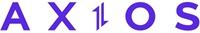

    - webpack loader -> js를 위한 모듈 번들러로 django와 vue.js를 연동

      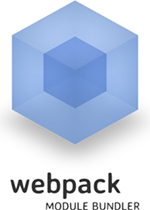

    - nginx -> vue.js로 생성한 웹 프로젝트를 서버로 배포

     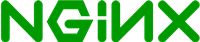

#이미지 전처리
  - aihub
    - 약 200,000장 중 모델링에 활용할 2954장 추가 수집 비만자료는 여전히 부족

#견종다합치기
  - 총 닥스훈트, 치와와, 비글, 리트리버, 웰시코기, 말티즈 정상 7152장
  
  - 총 닥스훈트, 치와와, 비글, 리트리버, 웰시코기, 말티즈 비만 1756장

  - 추가된 사진으로 데이터셋 12개 만들고 테스트중
  
  -set1
  
  이미지 크기 선명도 스케일링
  
  -set2
  
  이미지 크기 선명도 대비향상 스케일링
  
  -set3
  
  이미지 크기, 흑백, 선명도, 대비향상, 이진화, 스케일링
  
  -set4
  
  이미지크기, 대비향상(RGB적용X), 스케일링
  
  -set5
  
  이미지크기, 양방향필터, 이진화, 스케일링
  
  -set6
  
  대비향상(YUV 적용), 선명도
  
  -set7
  
  이미지크기, 배경제거(높이150)
  
  -set8
  
  이미지크기, 선명도, 배경제거(높이180)
  
  -set9

  이미지크기, 선명도, 배경제거(높이180) 흑백처리 가우시안블러
  
  -set10
  
  이미지크기 선명도 배경제거(높이180) 선명하게 대비높이기
  
  -set11
  
  대비향상(YUV적용), 선명도, 흑백, 모서리 감지, 가우시안블러
  
  -set12
  
  이미지크기, 대비향상(RGB적용X), 스케일링, 흑백, 선명하게


# roboflow
  -yolov5에 사용할 데이터셋 라벨링
  
  -총 5037장 이미지 변환 aihub 추가 이미지 2724장 대기중

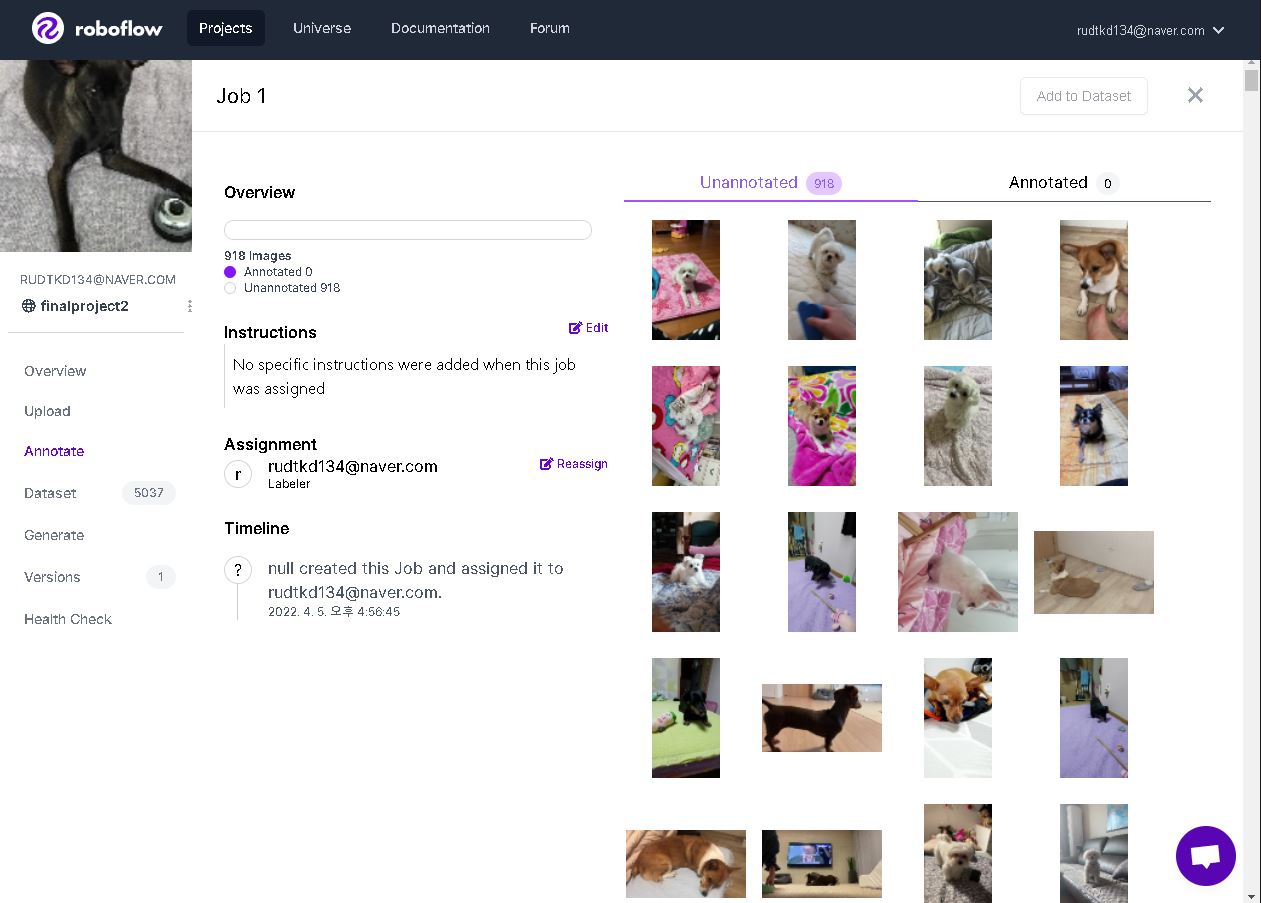

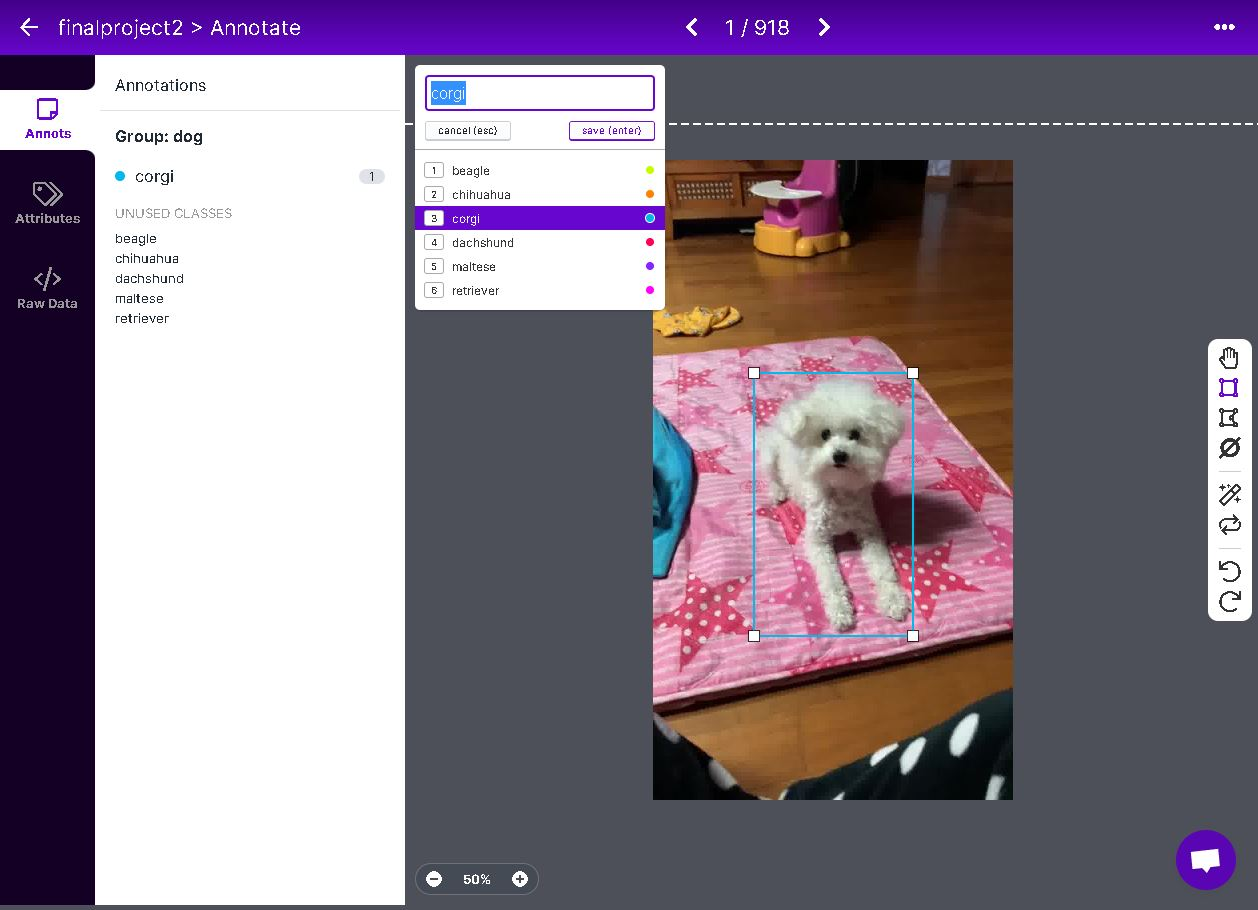

# yolov5
  - 객체 인식을 통한 정방향 이미지 자르기 시도

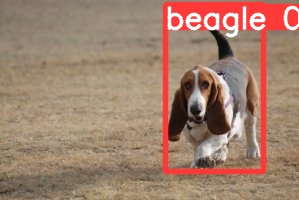

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp4/004.jpg')

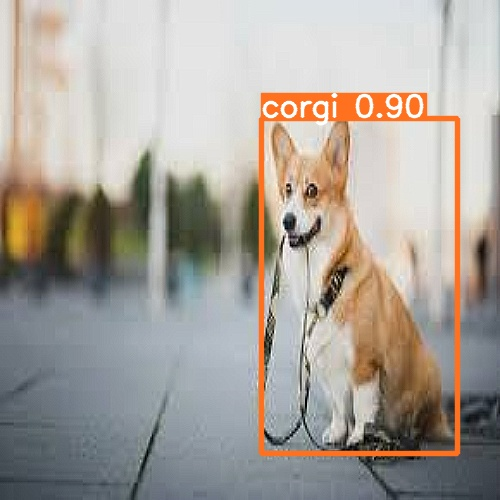

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp5/61.jpg')

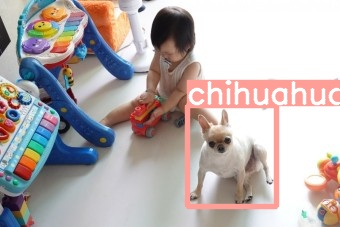

In [ ]:
display.Image(filename='/content/yolov5/runs/detect/exp6/243.jpg')

# 한계점
  - 웰시코기와 치와와를 구분하지 못하는 단점
  - 모델 성능, 시간 관계로 따로 만드는 작업 계속 진행